# Cross Sectional Factors Demo

This notebook demonstrates a toy example of how to create cross-sectional single and composite factors using the `CrossSectionalFactor` and `CompositeCrossSectionalFactor` classes.

____

In [5]:
# imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from src.factors.characteristic_config import CharacteristicConfig
from src.factors.cross_sectional_characteristic import CrossSectionalCharacteristic
from src.factors.composite_cross_sectional_factor import CompositeCrossSectionalFactor

## Establish Factor Data

### Momentum

We will construct a composite momentum factor from two characteristics:
- 9 month trailing return
- 12 month trailing return

We will equal weight the two characteristics in the composite factor.
_____

In [3]:
# toy example data

# characteristic 1: 9 month trailing return
TRAILING_9MO_RETURNS = np.array([
    0.15, 0.08, -0.12, 0.25, 0.05, 
    -0.03, 0.18, 0.11, -0.07, 0.21,
     0.09, -0.15, 0.13, 0.07, -0.09, 
     0.22, 0.04, -0.06, 0.16, -0.11, 
     0.19, 0.06, -0.08, 0.14, 0.50
    ])

# characteristic 2: 12 month trailing return
TRAILING_12MO_RETURNS = np.array([
    0.20, 0.12, -0.08, 0.30, 0.10,
    -0.05, 0.25, 0.15, -0.04, 0.28, 
    0.14, -0.10, 0.18, 0.11, -0.06,
    0.27, 0.08, -0.03, 0.22, -0.07,
    0.24, 0.09, -0.05, 0.19, 0.45
    ])

In [4]:
"""First, define the config parameters for the Momentum Characteristics"""
momentum_t9m_config = CharacteristicConfig(
    name="TSR(9M)",  # total shareholder return over the last 9 months
    log_raw_values=False,
    winsorize_raw_values=True,
    weight=0.5
)
momentum_t12m_config = CharacteristicConfig(
    name="TSR(12M)",  # total shareholder return over the last 12 months
    log_raw_values=False,
    winsorize_raw_values=True,
    weight=0.5
)
"""Next, create the characteristic objects by loading in the raw values and config we already defined"""
momentum_t9m_characteristic = CrossSectionalCharacteristic(
    raw_vector=TRAILING_9MO_RETURNS,
    config=momentum_t9m_config
)
momentum_t12m_characteristic = CrossSectionalCharacteristic(
    raw_vector=TRAILING_12MO_RETURNS,
    config=momentum_t12m_config
)

We can visualize the loadings on each security for each characteristic. . .

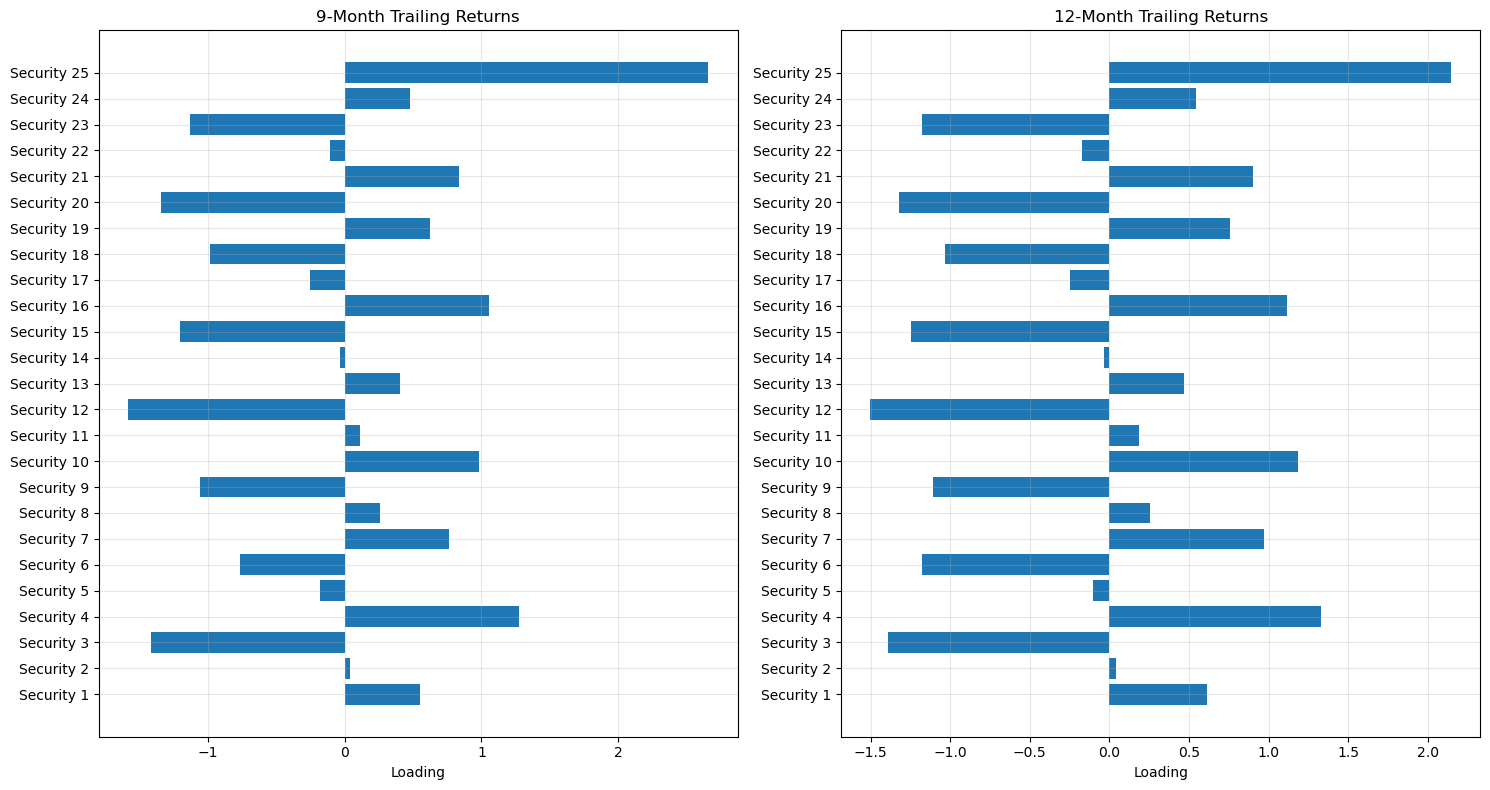

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
securities = [f'Security {i+1}' for i in range(len(TRAILING_9MO_RETURNS))]

# 9-month trailing returns
ax1.barh(securities, momentum_t9m_characteristic.get_loadings())
ax1.set_title('9-Month Trailing Returns')
ax1.set_xlabel('Loading')
ax1.grid(True, alpha=0.3)

# 12-month trailing returns
ax2.barh(securities, momentum_t12m_characteristic.get_loadings())
ax2.set_title('12-Month Trailing Returns')
ax2.set_xlabel('Loading')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

To combine the two characteristics into a single, composite factor, we can use the `CompositeCrossSectionalFactor` class.

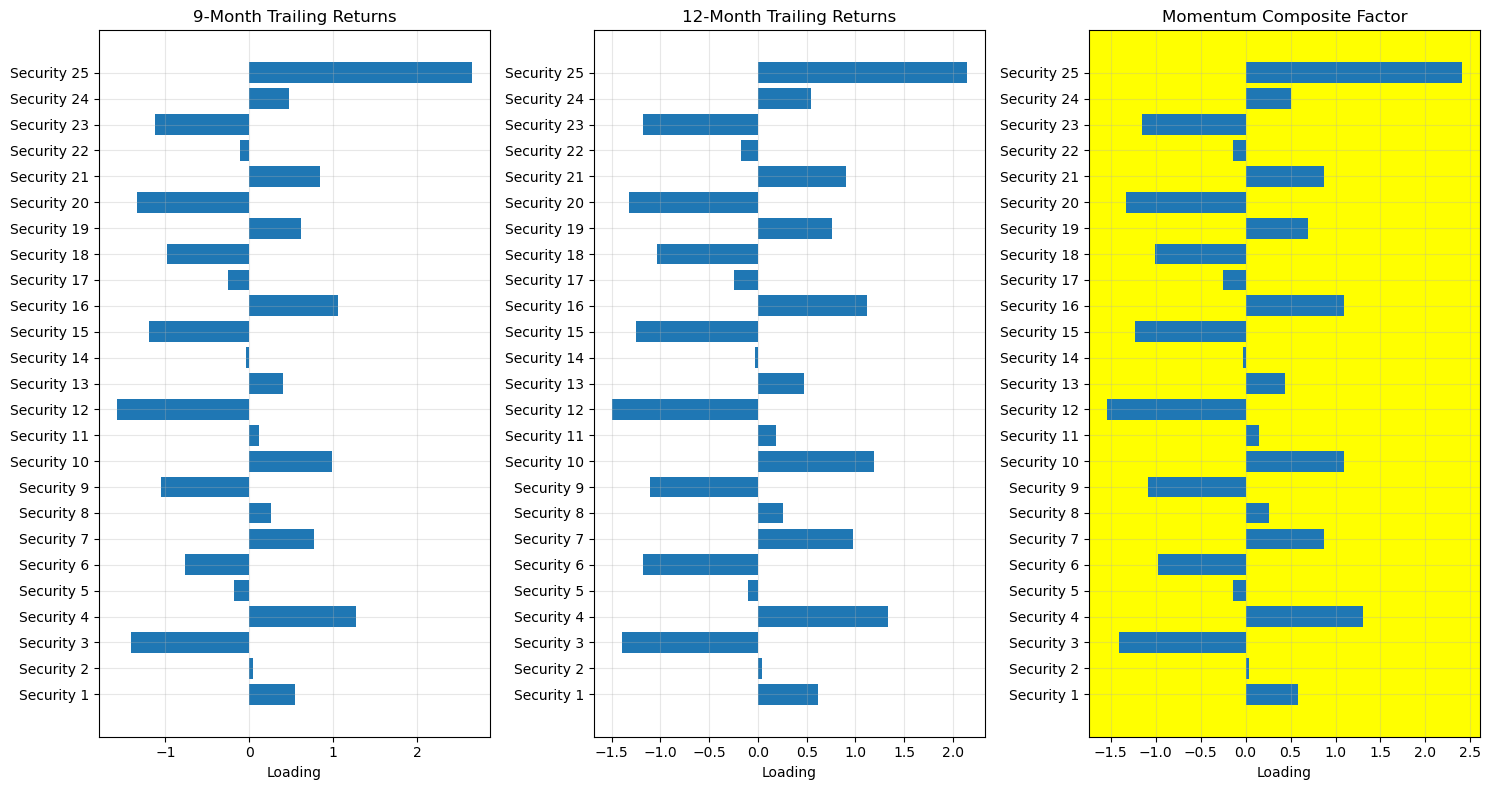

In [20]:
momentum_composite_factor = CompositeCrossSectionalFactor(
    characteristics=[momentum_t9m_characteristic, momentum_t12m_characteristic],
    name="Momentum"
)
momentum_composite_factor.process_loadings()
momentum_loadings = momentum_composite_factor.get_loadings()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 8))
securities = [f'Security {i+1}' for i in range(len(TRAILING_9MO_RETURNS))]

# 9-month trailing returns
ax1.barh(securities, momentum_t9m_characteristic.get_loadings())
ax1.set_title('9-Month Trailing Returns')
ax1.set_xlabel('Loading')
ax1.grid(True, alpha=0.3)

# 12-month trailing returns
ax2.barh(securities, momentum_t12m_characteristic.get_loadings())
ax2.set_title('12-Month Trailing Returns')
ax2.set_xlabel('Loading')
ax2.grid(True, alpha=0.3)

# Composite factor
ax3.barh(securities, momentum_loadings)
ax3.set_title('Momentum Composite Factor')
ax3.set_xlabel('Loading')
ax3.grid(True, alpha=0.3)
ax3.set_facecolor('yellow')

plt.tight_layout()
plt.show()